# Test curve fitting on some real data
Test curve fitting on some noisy real data:

In [1]:
import neutcurve

import pandas as pd

Read in the data:

In [2]:
data = pd.read_csv("test_curves_data.csv")

Fit the curves and display fit parameters:

In [3]:
fits = neutcurve.CurveFits(
    data,
    conc_col="concentration",
    fracinf_col="frac_infectivity",
    serum_col="serum",
    virus_col="strain",
    replicate_col="barcode",
)

fit_params = fits.fitParams(average_only=False, no_average=True).drop(
    columns=["nreplicates", "ic50_str"]
)
with pd.option_context("display.float_format", "{:.2g}".format):
    display(fit_params)

,serum,virus,replicate,ic50,ic50_bound,midpoint,slope,top,bottom
0,SerumAd0,A/India-PUN-NIV328484/2021,TTGTCCCGAGACAACA_rep2,0.0026,interpolated,0.0026,3.8,1,0
1,SerumAd0,A/India-PUN-NIV328484/2021,TCTGTTCCGGCCCGAA_rep2,0.0023,interpolated,0.0023,1.5,1,0
2,SerumAd0,A/India-PUN-NIV328484/2021,GATCTAATAATACGGC_rep2,3e-06,interpolated,3e-06,-2.9,1,0
3,SerumAd0,A/Togo/0274/2021,TAGCAGATGTATCAAT_rep2,0.0015,interpolated,0.0015,1.3,1,0
4,SerumAd0,A/Togo/0274/2021,GTAACATTATACGATT_rep2,2.6e-06,interpolated,2.6e-06,-1.6,1,0
5,SerumAd0,A/Togo/0274/2021,AACGAATGAATTTCTT_rep2,0.0021,interpolated,0.0021,1.9,1,0
6,SerumBd0,A/Bangladesh/3210810034/2021,AACTATAGATCTAGAA,0.0018,interpolated,0.0018,4.2,1,0
7,SerumBd0,A/Bangladesh/3210810034/2021,ACAAAAGTACCTCTAC,0.0021,interpolated,0.0021,8,1,0
8,SerumBd0,A/SouthAfrica/R14850/2021,AACTCCGCAGACACTG,0.00089,interpolated,0.00089,2,1,0
9,SerumBd0,A/SouthAfrica/R14850/2021,TACTCAACAAGATAAA,0.0011,interpolated,0.0011,3,1,0


Plot the curves:

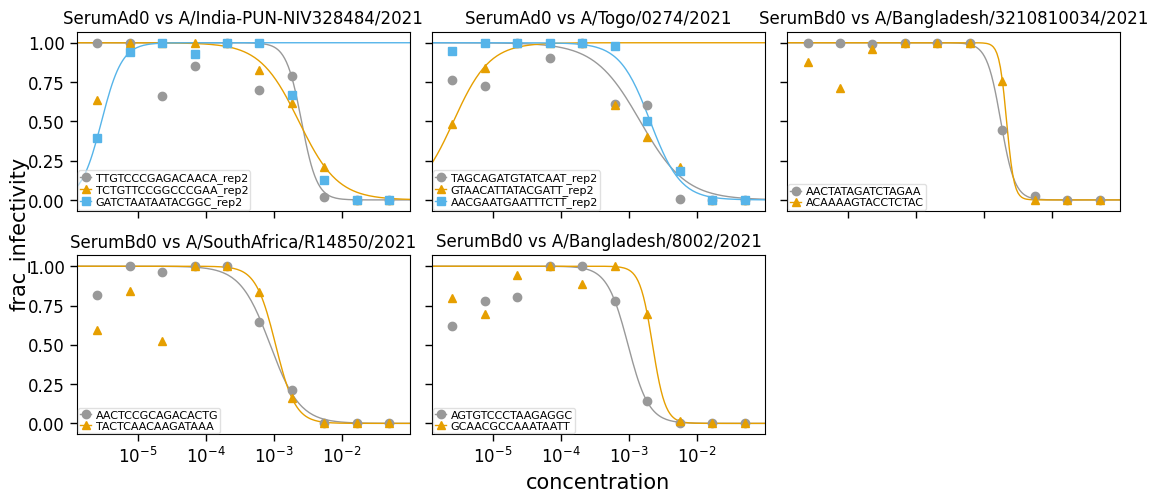

In [4]:
fig, _ = fits.plotReplicates(
    ncol=3,
    attempt_shared_legend=False,
    widthscale=1.2,
    legendfontsize=8,
    titlesize=12,
)